Ex 1


In [1]:
import pandas as pd

# Carregar o datase
df = pd.read_csv('household_power_consumption.txt', sep=';', na_values='?')

# Exibir as 10 primeiras linhas
print(df.head(10))

         Date      Time  Global_active_power  Global_reactive_power  Voltage  \
0  16/12/2006  17:24:00                4.216                  0.418   234.84   
1  16/12/2006  17:25:00                5.360                  0.436   233.63   
2  16/12/2006  17:26:00                5.374                  0.498   233.29   
3  16/12/2006  17:27:00                5.388                  0.502   233.74   
4  16/12/2006  17:28:00                3.666                  0.528   235.68   
5  16/12/2006  17:29:00                3.520                  0.522   235.02   
6  16/12/2006  17:30:00                3.702                  0.520   235.09   
7  16/12/2006  17:31:00                3.700                  0.520   235.22   
8  16/12/2006  17:32:00                3.668                  0.510   233.99   
9  16/12/2006  17:33:00                3.662                  0.510   233.86   

   Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
0              18.4             0.0             1

Ex 2

In [ ]:
- Global_active_power (Potência Ativa Global)

Representa a energia elétrica efetivamente consumida pelo equipamento/aparelho em quilowatts (kW).

É a energia que realmente realiza trabalho, como acender lâmpadas, aquecer água ou movimentar motores.

Exemplo: se você liga um chuveiro elétrico, o consumo medido pelo Global_active_power é a energia convertida em calor.

- Global_reactive_power (Potência Reativa Global)

Representa a energia que oscila entre a rede e o equipamento, medida em kVAr (quilovolt-ampere reativo).

Essa energia não realiza trabalho útil, mas é necessária para manter campos magnéticos em motores, transformadores e outros dispositivos elétricos.

Exemplo: motores elétricos precisam de potência reativa para criar o campo magnético que faz o motor girar, mesmo que não “consumam energia” diretamente.

Ex 3

In [2]:
# Verifica se existem valores ausentes
missing_values = df.isna().sum()

# Exibe a quantidade de valores ausentes por coluna
print("Valores ausentes por coluna:")
print(missing_values)

# Quantidade total de valores ausentes no dataset
total_missing = missing_values.sum()
print(f"\nTotal de valores ausentes no dataset: {total_missing}")

Valores ausentes por coluna:
Date                         0
Time                         0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

Total de valores ausentes no dataset: 181853


Ex 4


In [8]:
# Criando coluna Datetime a partir de Date e Time
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], dayfirst=True)

# Criando coluna Day_of_Week (nome do dia da semana)
df['Day_of_Week'] = df['Datetime'].dt.day_name()

df.head(10)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime,Day_of_Week
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00,Saturday
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00,Saturday
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00,Saturday
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00,Saturday
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00,Saturday
5,16/12/2006,17:29:00,3.520,0.522,235.02,15.0,0.0,2.0,17.0,2006-12-16 17:29:00,Saturday
6,16/12/2006,17:30:00,3.702,0.520,235.09,15.8,0.0,1.0,17.0,2006-12-16 17:30:00,Saturday
7,16/12/2006,17:31:00,3.700,0.520,235.22,15.8,0.0,1.0,17.0,2006-12-16 17:31:00,Saturday
8,16/12/2006,17:32:00,3.668,0.510,233.99,15.8,0.0,1.0,17.0,2006-12-16 17:32:00,Saturday
9,16/12/2006,17:33:00,3.662,0.510,233.86,15.8,0.0,2.0,16.0,2006-12-16 17:33:00,Saturday


Ex 5


In [10]:
df_2007 = df[df['Datetime'].dt.year == 2007].copy()

df_2007['Date_only'] = df_2007['Datetime'].dt.date

# Calcular a média diária de Global_active_power
daily_mean = df_2007.groupby('Date_only')['Global_active_power'].mean()

# Exibir os primeiros resultados
daily_mean.head(10)

,Global_active_power
Date_only,
2007-01-01,1.909031
2007-01-02,0.881414
2007-01-03,0.704204
2007-01-04,2.263481
2007-01-05,1.884281
2007-01-06,1.047485
2007-01-07,1.699736
2007-01-08,1.556500
2007-01-09,1.297954


Ex 6

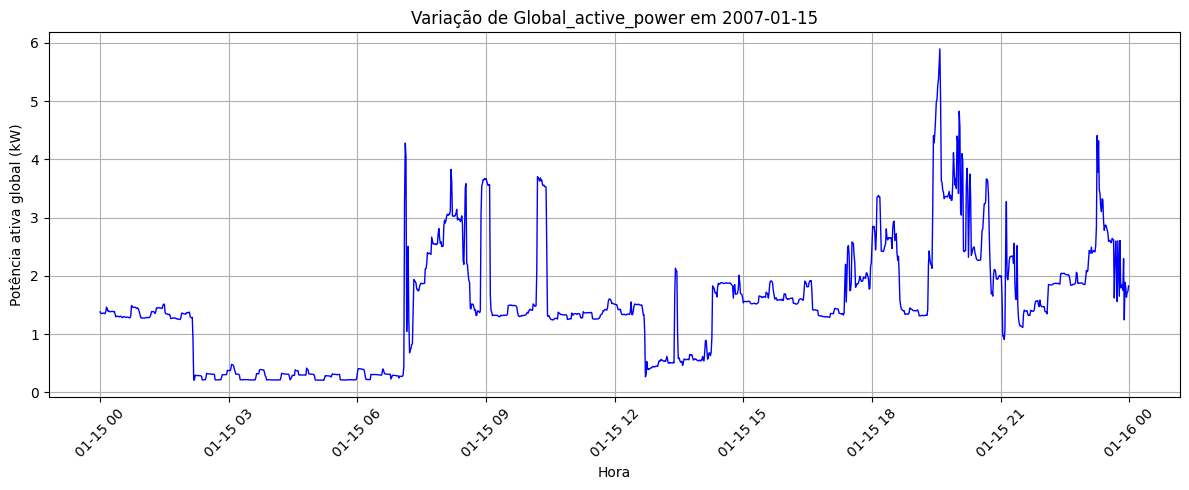

In [12]:
import matplotlib.pyplot as plt

# Selecionar um dia específico
selected_day = '2007-01-15'
df_day = df[df['Datetime'].dt.date == pd.to_datetime(selected_day).date()]

# Criar gráfico de linha
plt.figure(figsize=(12,5))
plt.plot(df_day['Datetime'], df_day['Global_active_power'], color='blue', linewidth=1)
plt.title(f'Variação de Global_active_power em {selected_day}')
plt.xlabel('Hora')
plt.ylabel('Potência ativa global (kW)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Ex 7

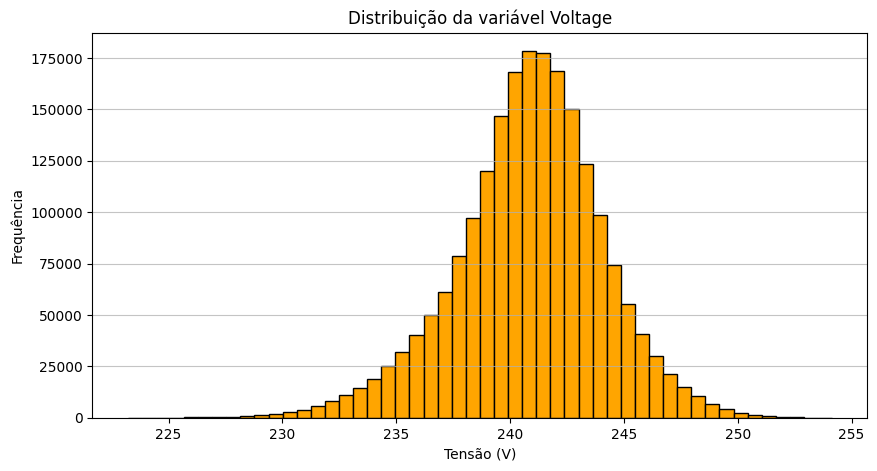

In [13]:
plt.figure(figsize=(10,5))
plt.hist(df['Voltage'].dropna(), bins=50, color='orange', edgecolor='black')
plt.title('Distribuição da variável Voltage')
plt.xlabel('Tensão (V)')
plt.ylabel('Frequência')
plt.grid(axis='y', alpha=0.75)
plt.show()

Ex 8

In [14]:
# Criar colunas de ano e mês
df['Year'] = df['Datetime'].dt.year
df['Month'] = df['Datetime'].dt.month

# Agrupar por ano e mês e calcular a média de Global_active_power
monthly_mean = df.groupby(['Year', 'Month'])['Global_active_power'].mean()

# Exibir os primeiros resultados
monthly_mean.head(12)

Year  Month
2006  12       1.901295
2007  1        1.546034
      2        1.401084
      3        1.318627
      4        0.891189
      5        0.985862
      6        0.826814
      7        0.667367
      8        0.764186
      9        0.969318
      10       1.103911
      11       1.294473
Name: Global_active_power, dtype: float64

Ex 9

In [15]:
# Criar coluna apenas com a data (sem hora)
df['Date_only'] = df['Datetime'].dt.date

# Calcular o consumo total diário de Global_active_power
daily_total = df.groupby('Date_only')['Global_active_power'].sum()

# Identificar o dia com maior consumo
max_day = daily_total.idxmax()
max_value = daily_total.max()

print(f"O dia com maior consumo de energia ativa global foi {max_day} com {max_value:.2f} kW")

O dia com maior consumo de energia ativa global foi 2006-12-23 com 4773.39 kW


Ex 10

In [16]:
# Criar coluna indicando se é fim de semana (Saturday ou Sunday)
df['Is_Weekend'] = df['Day_of_Week'].isin(['Saturday', 'Sunday'])

# Agrupar e calcular a média de Global_active_power
mean_consumption = df.groupby('Is_Weekend')['Global_active_power'].mean()

# Exibir os resultados
mean_consumption.rename({False: 'Dias de Semana', True: 'Finais de Semana'})

,Global_active_power
Is_Weekend,
Dias de Semana,1.035472
Finais de Semana,1.234232


Ex 11

In [17]:
# Selecionar as colunas de interesse
cols = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']

# Calcular a correlação
correlation_matrix = df[cols].corr()

# Exibir a matriz de correlação
print(correlation_matrix)

                       Global_active_power  Global_reactive_power   Voltage  \
Global_active_power               1.000000               0.247017 -0.399762   
Global_reactive_power             0.247017               1.000000 -0.112246   
Voltage                          -0.399762              -0.112246  1.000000   
Global_intensity                  0.998889               0.266120 -0.411363   

                       Global_intensity  
Global_active_power            0.998889  
Global_reactive_power          0.266120  
Voltage                       -0.411363  
Global_intensity               1.000000  


Ex 12

In [18]:
# Criando a coluna Total_Sub_metering
df['Total_Sub_metering'] = df['Sub_metering_1'] + df['Sub_metering_2'] + df['Sub_metering_3']

# Exibir as primeiras linhas para conferir
df[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3', 'Total_Sub_metering']].head(10)

,Sub_metering_1,Sub_metering_2,Sub_metering_3,Total_Sub_metering
0,0.0,1.0,17.0,18.0
1,0.0,1.0,16.0,17.0
2,0.0,2.0,17.0,19.0
3,0.0,1.0,17.0,18.0
4,0.0,1.0,17.0,18.0
5,0.0,2.0,17.0,19.0
6,0.0,1.0,17.0,18.0
7,0.0,1.0,17.0,18.0
8,0.0,1.0,17.0,18.0
9,0.0,2.0,16.0,18.0


Ex 13

In [19]:
df['Year'] = df['Datetime'].dt.year
df['Month'] = df['Datetime'].dt.month

# Agrupar por ano e mês e calcular a média de Total_Sub_metering
monthly_total_sub = df.groupby(['Year','Month'])['Total_Sub_metering'].mean()

# Média global de Global_active_power
mean_global_active = df['Global_active_power'].mean()

# Verificar meses em que Total_Sub_metering ultrapassa a média de Global_active_power
months_exceeding = monthly_total_sub[monthly_total_sub > mean_global_active]

print("Meses em que Total_Sub_metering ultrapassa a média de Global_active_power:")
print(months_exceeding)

Meses em que Total_Sub_metering ultrapassa a média de Global_active_power:
Year  Month
2006  12       10.873181
2007  1        10.423518
      2         9.486135
      3        10.212863
      4         6.839375
      5         8.452442
      6         7.379151
      7         5.697724
      8         6.979336
      9         8.206236
      10        8.674493
      11        9.819413
      12       11.636551
2008  1         9.786218
      2         8.447829
      3         9.454894
      4         9.574745
      5         9.019468
      6         9.775226
      7         7.145414
      8         2.370223
      9         8.825185
      10        8.592686
      11        9.135445
      12        8.793377
2009  1        10.690405
      2         9.786069
      3         9.896702
      4         9.605699
      5         9.067053
      6         8.049430
      7         5.571512
      8         6.041372
      9         9.127787
      10        9.766393
      11       10.404107
      12     

Ex 14


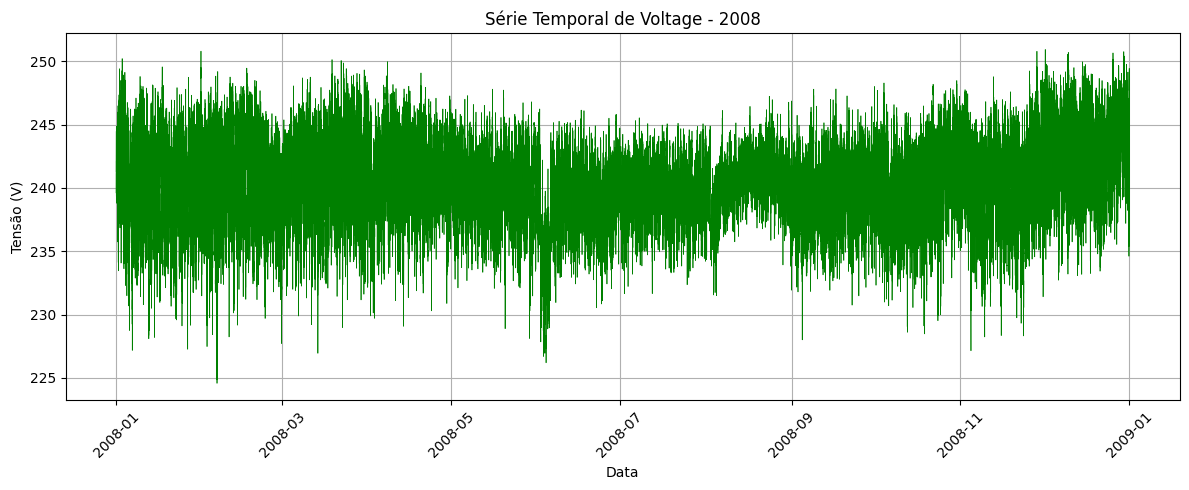

In [20]:
# Filtrar registros do ano de 2008
df_2008 = df[df['Datetime'].dt.year == 2008]

# Criar gráfico de série temporal
plt.figure(figsize=(12,5))
plt.plot(df_2008['Datetime'], df_2008['Voltage'], color='green', linewidth=0.5)
plt.title('Série Temporal de Voltage - 2008')
plt.xlabel('Data')
plt.ylabel('Tensão (V)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Ex 15

In [24]:
# Criar coluna de estação
def season(month):
    if month in [6, 7, 8]:
        return 'Verão'
    elif month in [12, 1, 2]:
        return 'Inverno'
    else:
        return 'Outras'

df['Season'] = df['Month'].apply(season)

# Agrupar por estação e calcular a média de Global_active_power
seasonal_mean = df.groupby('Season')['Global_active_power'].mean()

# Exibir resultados
print(seasonal_mean)

Season
Inverno    1.417623
Outras     1.118732
Verão      0.726682
Name: Global_active_power, dtype: float64


Ex 16

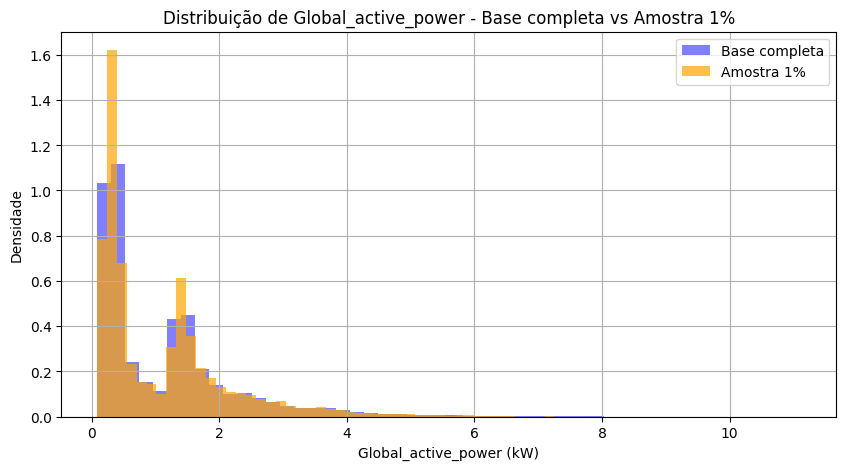

In [25]:
# Amostragem aleatória de 1% dos dados
df_sample = df.sample(frac=0.01, random_state=42)  # random_state para reprodutibilidade

# Plotar histogramas sobrepostos
plt.figure(figsize=(10,5))
plt.hist(df['Global_active_power'].dropna(), bins=50, alpha=0.5, label='Base completa', color='blue', density=True)
plt.hist(df_sample['Global_active_power'].dropna(), bins=50, alpha=0.7, label='Amostra 1%', color='orange', density=True)
plt.title('Distribuição de Global_active_power - Base completa vs Amostra 1%')
plt.xlabel('Global_active_power (kW)')
plt.ylabel('Densidade')
plt.legend()
plt.grid(True)
plt.show()

Ex 17

In [26]:
from sklearn.preprocessing import MinMaxScaler

# Selecionar colunas numéricas principais
num_cols = ['Global_active_power','Global_reactive_power','Voltage','Global_intensity',
            'Sub_metering_1','Sub_metering_2','Sub_metering_3','Total_Sub_metering']

# Criar o scaler
scaler = MinMaxScaler()

# Aplicar Min-Max Scaling
df_scaled = df.copy()  # criar cópia para não sobrescrever o original
df_scaled[num_cols] = scaler.fit_transform(df[num_cols])

# Exibir as primeiras linhas para conferir
df_scaled[num_cols].head(10)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Total_Sub_metering
0,0.374796,0.300719,0.376090,0.377593,0.0,0.0125,0.548387,0.134328
1,0.478363,0.313669,0.336995,0.473029,0.0,0.0125,0.516129,0.126866
2,0.479631,0.358273,0.326010,0.473029,0.0,0.0250,0.548387,0.141791
3,0.480898,0.361151,0.340549,0.473029,0.0,0.0125,0.548387,0.134328
4,0.325005,0.379856,0.403231,0.323651,0.0,0.0125,0.548387,0.134328
5,0.311787,0.375540,0.381906,0.307054,0.0,0.0250,0.548387,0.141791
6,0.328264,0.374101,0.384168,0.323651,0.0,0.0125,0.548387,0.134328
7,0.328083,0.374101,0.388368,0.323651,0.0,0.0125,0.548387,0.134328
8,0.325186,0.366906,0.348627,0.323651,0.0,0.0125,0.548387,0.134328
9,0.324642,0.366906,0.344426,0.323651,0.0,0.0250,0.516129,0.134328


Ex 18

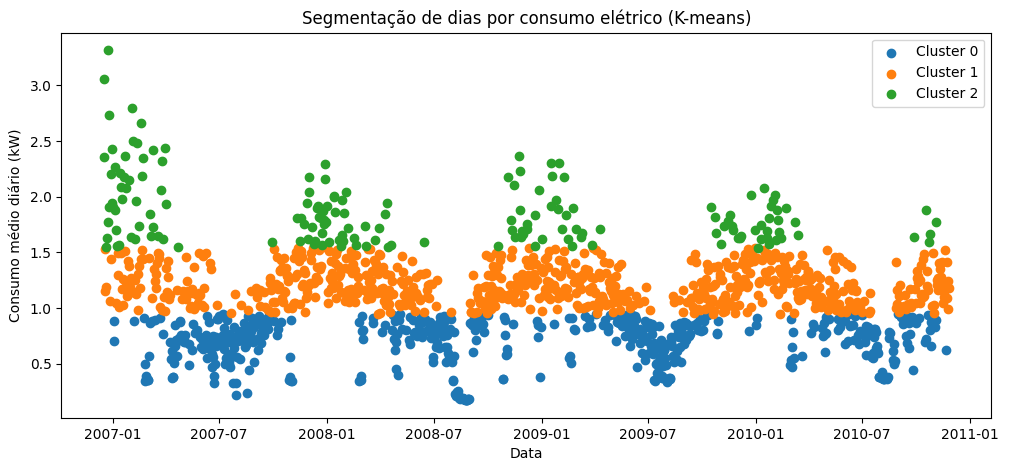

         count      mean       std       min       25%       50%       75%  \
Cluster                                                                      
0        533.0  0.689159  0.203085  0.173818  0.565113  0.747960  0.849814   
1        734.0  1.208707  0.160536  0.950769  1.080892  1.182147  1.334606   
2        166.0  1.869834  0.304959  1.541514  1.639444  1.784373  1.989915   

              max  
Cluster            
0        0.950171  
1        1.540891  
2        3.314851  


In [28]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Média diária de Global_active_power
df['Date_only'] = df['Datetime'].dt.date
daily_mean = df.groupby('Date_only')['Global_active_power'].mean().reset_index()

# Remover dias com NaN
daily_mean = daily_mean.dropna(subset=['Global_active_power'])

# Normalizar
scaler = MinMaxScaler()
daily_mean_scaled = scaler.fit_transform(daily_mean[['Global_active_power']])

# Aplicar K-means
kmeans = KMeans(n_clusters=3, random_state=42)
daily_mean['Cluster'] = kmeans.fit_predict(daily_mean_scaled)

# Visualizar clusters
plt.figure(figsize=(12,5))
for cluster in range(3):
    cluster_data = daily_mean[daily_mean['Cluster']==cluster]
    plt.scatter(cluster_data['Date_only'], cluster_data['Global_active_power'], label=f'Cluster {cluster}')
plt.xlabel('Data')
plt.ylabel('Consumo médio diário (kW)')
plt.title('Segmentação de dias por consumo elétrico (K-means)')
plt.legend()
plt.show()

# Resumo de cada cluster
cluster_summary = daily_mean.groupby('Cluster')['Global_active_power'].describe()
print(cluster_summary)

Ex 19

/tmp/ipython-input-583353526.py:9: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  ts = df_6months.set_index('Datetime')['Global_active_power'].asfreq('H')  # frequencia horária


<Figure size 1200x1000 with 0 Axes>

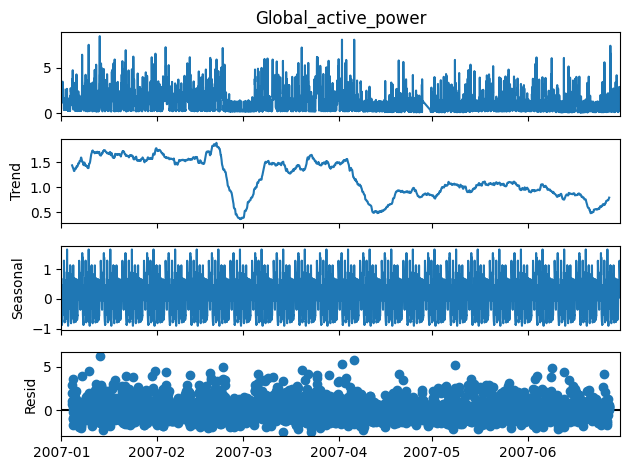

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Filtrar os primeiros 6 meses de 2007
df_6months = df[(df['Datetime'] >= '2007-01-01') & (df['Datetime'] < '2007-07-01')]

# Criar série temporal com Datetime como índice
ts = df_6months.set_index('Datetime')['Global_active_power'].asfreq('H')  # frequencia horária

# Preencher valores ausentes por interpolação linear
ts = ts.interpolate(method='linear')

# Decomposição da série temporal
decomposition = seasonal_decompose(ts, model='additive', period=24*7)  # período semanal (7 dias * 24h)

# Plotar os componentes
plt.figure(figsize=(12,10))
decomposition.plot()
plt.tight_layout()
plt.show()

Ex 20

MSE: 0.0025
MAE: 0.0341
R²: 0.9978


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


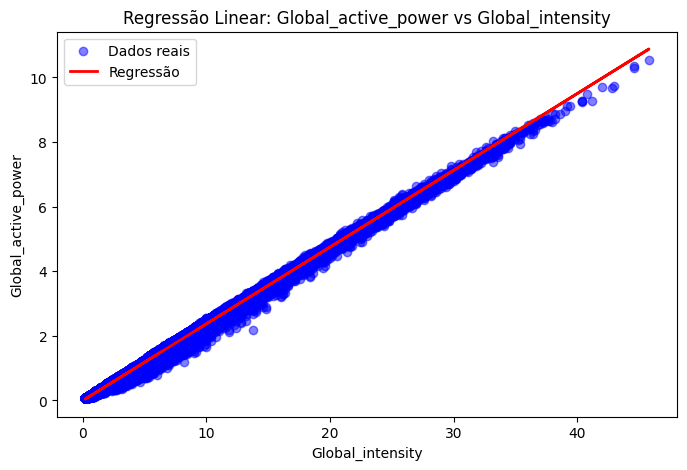

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Selecionar variáveis
X = df[['Global_intensity']].dropna()
y = df['Global_active_power'].dropna()

# Garantir que X e y tenham o mesmo tamanho após remoção de NaNs
data = pd.concat([X, y], axis=1).dropna()
X = data[['Global_intensity']]
y = data['Global_active_power']

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse:.4f}')
print(f'MAE: {mae:.4f}')
print(f'R²: {r2:.4f}')

# Gráfico de dispersão e linha de regressão
plt.figure(figsize=(8,5))
plt.scatter(X_test, y_test, color='blue', alpha=0.5, label='Dados reais')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regressão')
plt.xlabel('Global_intensity')
plt.ylabel('Global_active_power')
plt.title('Regressão Linear: Global_active_power vs Global_intensity')
plt.legend()
plt.show()

Ex 21

/tmp/ipython-input-1342763984.py:9: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_mean = df_ts['Global_active_power'].resample('H').mean()


Horário de maior consumo médio: 20:00 com 1.90 kW


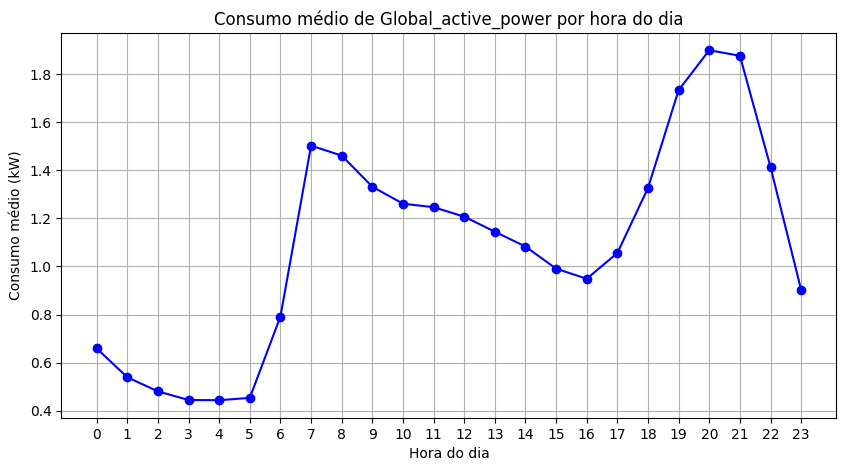

In [31]:
import pandas as pd

# Converter Date e Time em índice datetime

df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], dayfirst=True)
df_ts = df.set_index('Datetime')

# Reamostrar os dados em intervalos de 1 hora, calculando a média de Global_active_power
hourly_mean = df_ts['Global_active_power'].resample('H').mean()

# Identificar horários de maior consumo médio ao longo do dia
# Extrair a hora do dia
hourly_mean_df = hourly_mean.reset_index()
hourly_mean_df['Hour'] = hourly_mean_df['Datetime'].dt.hour

# Agrupar por hora do dia e calcular a média ao longo de todos os dias
mean_by_hour = hourly_mean_df.groupby('Hour')['Global_active_power'].mean()

# Mostrar os horários com maior consumo médio
max_hour = mean_by_hour.idxmax()
max_value = mean_by_hour.max()

print(f"Horário de maior consumo médio: {max_hour}:00 com {max_value:.2f} kW")

#plotar a média de consumo por hora
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(mean_by_hour.index, mean_by_hour.values, marker='o', color='blue')
plt.title('Consumo médio de Global_active_power por hora do dia')
plt.xlabel('Hora do dia')
plt.ylabel('Consumo médio (kW)')
plt.xticks(range(0,24))
plt.grid(True)
plt.show()

Ex 22

In [33]:
import pandas as pd

# Garantir que Datetime é índice
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], dayfirst=True)
df_ts = df.set_index('Datetime')

# Criar série temporal de consumo
ts = df_ts['Global_active_power'].resample('h').mean()  # média horária

# Calcular autocorrelação
autocorr_1h = ts.autocorr(lag=1)
autocorr_24h = ts.autocorr(lag=24)
autocorr_48h = ts.autocorr(lag=48)

print(f"Autocorrelação com lag 1h: {autocorr_1h:.4f}")
print(f"Autocorrelação com lag 24h: {autocorr_24h:.4f}")
print(f"Autocorrelação com lag 48h: {autocorr_48h:.4f}")


Autocorrelação com lag 1h: 0.7135
Autocorrelação com lag 24h: 0.4359
Autocorrelação com lag 48h: 0.4013


Ex 23

In [34]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Selecionar colunas
features = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']
X = df[features].dropna()  # remover valores ausentes

# Padronizar os dados (muito importante para PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA com 2 componentes principais
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

# Variância explicada
explained_variance = pca.explained_variance_ratio_
print(f"Variância explicada pelo componente 1: {explained_variance[0]:.4f}")
print(f"Variância explicada pelo componente 2: {explained_variance[1]:.4f}")

# Criar DataFrame com os componentes principais
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
df_pca.head()

Variância explicada pelo componente 1: 0.5910
Variância explicada pelo componente 2: 0.2272


,PC1,PC2
0,5.191176,1.241976
1,6.698092,1.070631
2,6.894031,1.544068
3,6.857242,1.623923
4,4.661351,2.337338


Ex 24

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


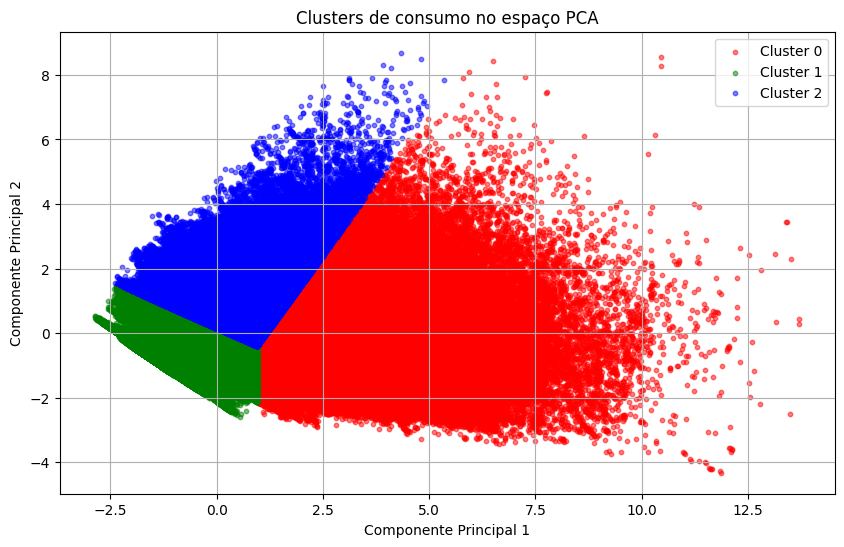

In [35]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Aplicar K-means nos componentes principais
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(df_pca)  # df_pca contém PC1 e PC2

# Adicionar os clusters ao DataFrame PCA
df_pca['Cluster'] = clusters

# Plotar os clusters
plt.figure(figsize=(10,6))
colors = ['red', 'green', 'blue']

for cluster in range(3):
    cluster_data = df_pca[df_pca['Cluster'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'],
                s=10, c=colors[cluster], label=f'Cluster {cluster}', alpha=0.5)

plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Clusters de consumo no espaço PCA')
plt.legend()
plt.grid(True)
plt.show()


Ex 25

RMSE Linear: 0.9719
RMSE Polinomial (grau 2): 0.9674


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


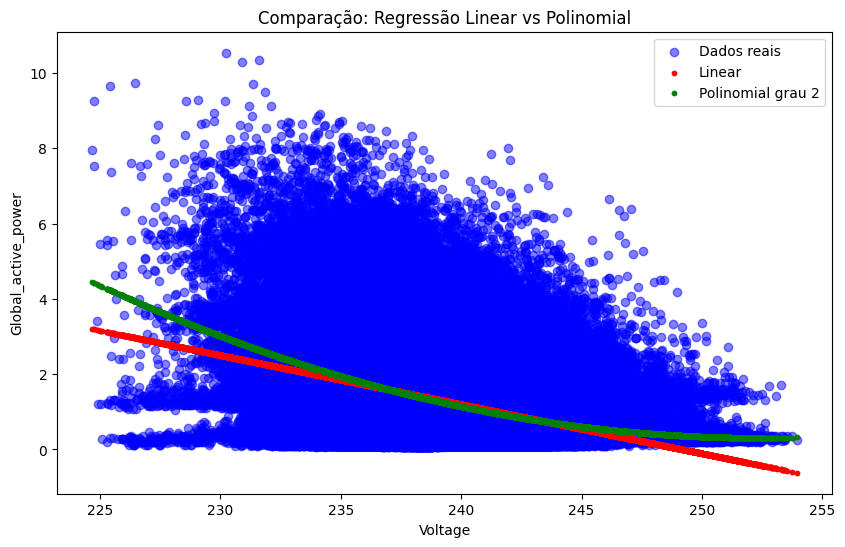

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Selecionar variáveis
X = df[['Voltage']].dropna()
y = df['Global_active_power'].dropna()

# Garantir que X e y tenham o mesmo tamanho após remoção de NaNs
data = pd.concat([X, y], axis=1).dropna()
X = data[['Voltage']]
y = data['Global_active_power']

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Regressão Linear Simples
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
y_pred_lin = lin_model.predict(X_test)
rmse_lin = np.sqrt(mean_squared_error(y_test, y_pred_lin))

# Regressão Polinomial (grau 2)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)
rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))

print(f"RMSE Linear: {rmse_lin:.4f}")
print(f"RMSE Polinomial (grau 2): {rmse_poly:.4f}")

# Plotar os resultados
plt.figure(figsize=(10,6))
plt.scatter(X_test, y_test, color='blue', alpha=0.5, label='Dados reais')
plt.scatter(X_test, y_pred_lin, color='red', s=10, label='Linear')
plt.scatter(X_test, y_pred_poly, color='green', s=10, label='Polinomial grau 2')
plt.xlabel('Voltage')
plt.ylabel('Global_active_power')
plt.title('Comparação: Regressão Linear vs Polinomial')
plt.legend()
plt.show()


Ex 26

In [37]:
import pandas as pd

# Carregar o dataset
df_energy = pd.read_csv('energydata_complete.csv')

# Converter a coluna 'date' para datetime
df_energy['date'] = pd.to_datetime(df_energy['date'])

# Informações gerais sobre o dataset
print("Informações do DataFrame:")
print(df_energy.info())

# Estatísticas descritivas das colunas numéricas
print("\nEstatísticas descritivas:")
print(df_energy.describe())

Informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         19735 non-null  datetime64[ns]
 1   Appliances   19735 non-null  int64         
 2   lights       19735 non-null  int64         
 3   T1           19735 non-null  float64       
 4   RH_1         19735 non-null  float64       
 5   T2           19735 non-null  float64       
 6   RH_2         19735 non-null  float64       
 7   T3           19735 non-null  float64       
 8   RH_3         19735 non-null  float64       
 9   T4           19735 non-null  float64       
 10  RH_4         19735 non-null  float64       
 11  T5           19735 non-null  float64       
 12  RH_5         19735 non-null  float64       
 13  T6           19735 non-null  float64       
 14  RH_6         19735 non-null  float64       
 15  T7           19735 non-null

Ex 27

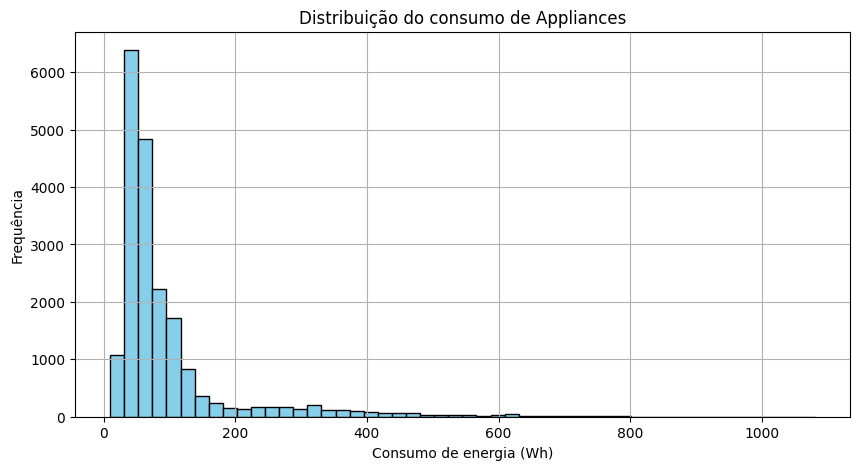

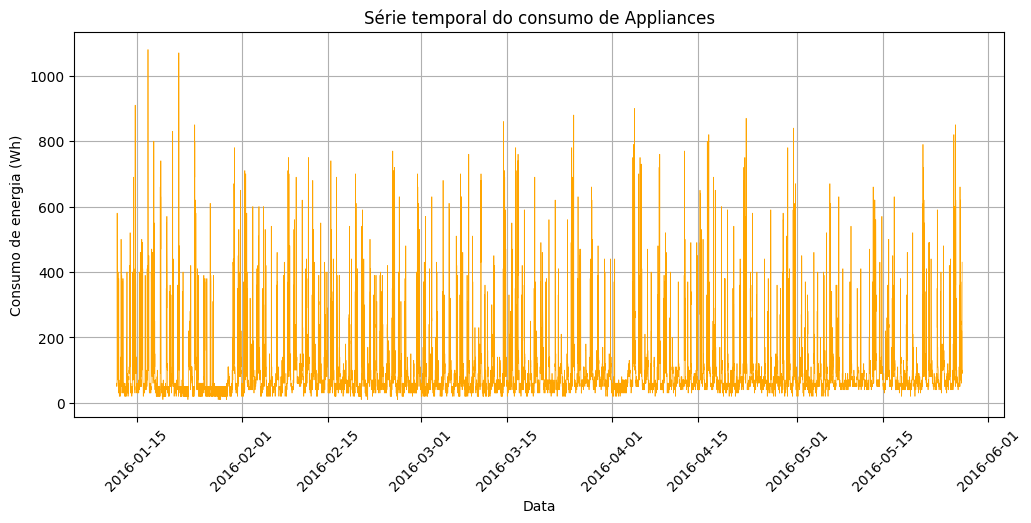

In [38]:
import matplotlib.pyplot as plt

# Histograma do consumo de Appliances
plt.figure(figsize=(10,5))
plt.hist(df_energy['Appliances'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribuição do consumo de Appliances')
plt.xlabel('Consumo de energia (Wh)')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

# Série temporal do consumo
plt.figure(figsize=(12,5))
plt.plot(df_energy['date'], df_energy['Appliances'], color='orange', linewidth=0.5)
plt.title('Série temporal do consumo de Appliances')
plt.xlabel('Data')
plt.ylabel('Consumo de energia (Wh)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

O consumo tende a se concentrar em valores altos-medianos

Ex 28

In [39]:
# Selecionar colunas de interesse
env_vars = ['T1','RH_1','T2','RH_2','T3','RH_3','T4','RH_4','T5','RH_5',
            'T6','RH_6','T7','RH_7','T8','RH_8','T9','RH_9','T_out','RH_out']

# Calcular correlação com Appliances
correlations = df_energy[env_vars + ['Appliances']].corr()['Appliances'].sort_values(ascending=False)

# Mostrar resultados
print("Correlação de Appliances com variáveis ambientais:")
print(correlations)

Correlação de Appliances com variáveis ambientais:
Appliances    1.000000
T2            0.120073
T6            0.117638
T_out         0.099155
RH_1          0.086031
T3            0.085060
T1            0.055447
T4            0.040281
T8            0.039572
RH_3          0.036292
T7            0.025801
T5            0.019760
RH_4          0.016965
T9            0.010010
RH_5          0.006955
RH_9         -0.051462
RH_7         -0.055642
RH_2         -0.060465
RH_6         -0.083178
RH_8         -0.094039
RH_out       -0.152282
Name: Appliances, dtype: float64


Ex 29

In [40]:
from sklearn.preprocessing import MinMaxScaler

# Selecionar colunas numéricas (exceto a coluna 'date')
num_cols = df_energy.select_dtypes(include=['float64', 'int64']).columns.tolist()
num_cols.remove('Appliances')  # se quiser, podemos escalar Appliances depois ou mantê-la para previsão

# Criar scaler
scaler = MinMaxScaler()

# Aplicar Min-Max Scaling
df_scaled = df_energy.copy()
df_scaled[num_cols] = scaler.fit_transform(df_energy[num_cols])

# Conferir as primeiras linhas
df_scaled[num_cols].head(10)

,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,0.428571,0.32735,0.566187,0.225345,0.684038,0.215188,0.746066,0.351351,0.764262,0.175506,...,0.223032,0.677290,0.372990,0.097674,0.894737,0.500000,0.953846,0.538462,0.265449,0.265449
1,0.428571,0.32735,0.541326,0.225345,0.682140,0.215188,0.748871,0.351351,0.782437,0.175506,...,0.226500,0.678532,0.369239,0.100000,0.894737,0.476190,0.894872,0.533937,0.372083,0.372083
2,0.428571,0.32735,0.530502,0.225345,0.679445,0.215188,0.755569,0.344745,0.778062,0.175506,...,0.219563,0.676049,0.365488,0.102326,0.894737,0.452381,0.835897,0.529412,0.572848,0.572848
3,0.571429,0.32735,0.524080,0.225345,0.678414,0.215188,0.758685,0.341441,0.770949,0.175506,...,0.219563,0.671909,0.361736,0.104651,0.894737,0.428571,0.776923,0.524887,0.908261,0.908261
4,0.571429,0.32735,0.531419,0.225345,0.676727,0.215188,0.758685,0.341441,0.762697,0.178691,...,0.219563,0.671909,0.357985,0.106977,0.894737,0.404762,0.717949,0.520362,0.201611,0.201611
5,0.571429,0.32735,0.522980,0.225345,0.675883,0.215188,0.755569,0.341441,0.771233,0.172320,...,0.219563,0.667357,0.354234,0.109302,0.894737,0.380952,0.658974,0.515837,0.898441,0.898441
6,0.714286,0.32735,0.515824,0.225345,0.675883,0.215188,0.754012,0.341441,0.773794,0.169135,...,0.219563,0.667357,0.350482,0.111628,0.894737,0.357143,0.600000,0.511312,0.944735,0.944735
7,0.714286,0.32383,0.510137,0.225345,0.675883,0.210203,0.754012,0.341441,0.776924,0.169135,...,0.219563,0.667357,0.351018,0.113178,0.892544,0.369048,0.600000,0.510558,0.660808,0.660808
8,0.571429,0.31679,0.511169,0.225345,0.674009,0.210203,0.748871,0.341441,0.773794,0.175506,...,0.219563,0.667357,0.351554,0.114729,0.890351,0.380952,0.600000,0.509804,0.629118,0.629118
9,0.571429,0.32383,0.524723,0.227526,0.673072,0.215188,0.752298,0.341441,0.786883,0.169135,...,0.219563,0.667357,0.352090,0.116279,0.888158,0.392857,0.600000,0.509050,0.061691,0.061691


Ex 30

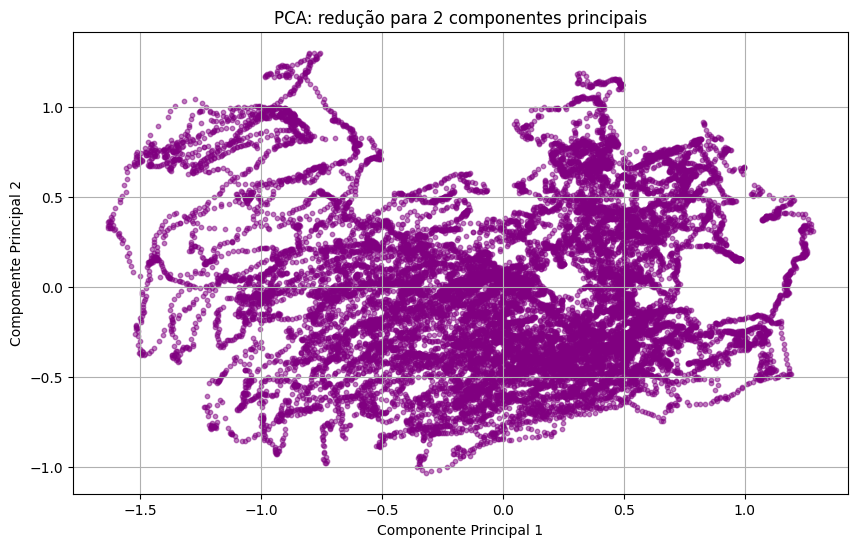

Variância explicada pelo PC1: 0.3643
Variância explicada pelo PC2: 0.2110


In [41]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Selecionar apenas as variáveis numéricas escaladas
X = df_scaled[num_cols]

# Aplicar PCA para reduzir para 2 componentes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Criar DataFrame com os componentes principais
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

# Plotar os dados
plt.figure(figsize=(10,6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], alpha=0.5, s=10, color='purple')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('PCA: redução para 2 componentes principais')
plt.grid(True)
plt.show()

# Variância explicada
explained_variance = pca.explained_variance_ratio_
print(f"Variância explicada pelo PC1: {explained_variance[0]:.4f}")
print(f"Variância explicada pelo PC2: {explained_variance[1]:.4f}")


Ex 31

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Selecionar variáveis explicativas (temperatura e umidade)
env_vars = ['T1','RH_1','T2','RH_2','T3','RH_3','T4','RH_4','T5','RH_5',
            'T6','RH_6','T7','RH_7','T8','RH_8','T9','RH_9','T_out','RH_out']

X = df_scaled[env_vars]  # usar dados normalizados
y = df_scaled['Appliances']  # variável alvo

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar regressão linear múltipla
model = LinearRegression()
model.fit(X_train, y_train)

# Previsões
y_pred = model.predict(X_test)

# Avaliação do modelo
r2 = model.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R²: {r2:.4f}")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")


R²: 0.1430
MSE: 8576.3825
MAE: 53.5738


Ex 32

In [43]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Selecionar variáveis explicativas (mesmo que na regressão linear)
X = df_scaled[env_vars]
y = df_scaled['Appliances']

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Previsões
y_pred_rf = rf_model.predict(X_test)

# Avaliar o modelo
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print(f"RMSE Random Forest: {rmse_rf:.4f}")

# Comparação com regressão linear múltipla
rmse_lr = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))
print(f"RMSE Regressão Linear: {rmse_lr:.4f}")


RMSE Random Forest: 63.8783
RMSE Regressão Linear: 92.6088


Ex 33

/tmp/ipython-input-1103150563.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_cluster[f'Cluster_{k}'] = cluster_labels
/tmp/ipython-input-1103150563.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_cluster[f'Cluster_{k}'] = cluster_labels
/tmp/ipython-input-1103150563.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

Perfis médios de consumo e variáveis ambientais (3 clusters):
           Appliances        T1      RH_1     T_out    RH_out  Cluster_4  \
Cluster_3                                                                  
0           67.209752  0.517159  0.361014  0.395576  0.740698   0.902370   
1          566.531049  0.521366  0.395240  0.432837  0.659006   1.053533   
2          287.701975  0.514835  0.389916  0.426654  0.679206   2.132855   

           Cluster_5  
Cluster_3             
0           0.902370  
1           2.541756  
2           1.766607  


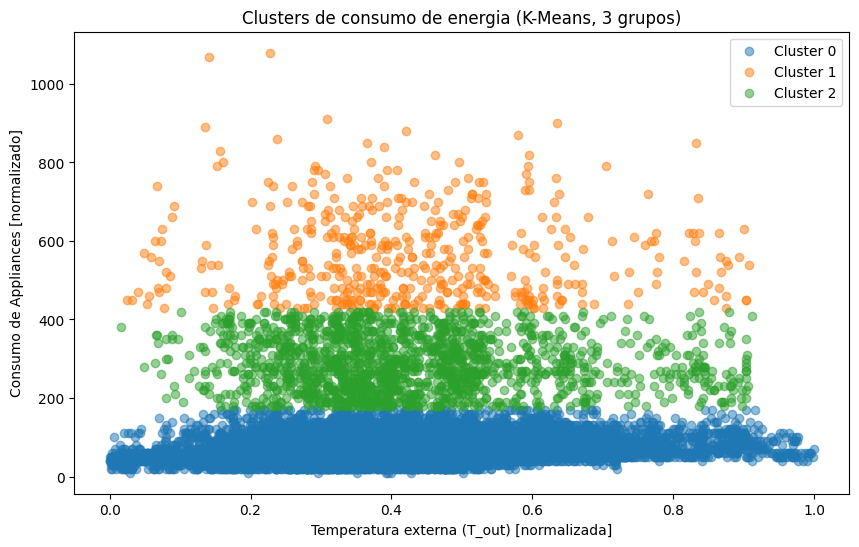

In [44]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

# Selecionar variáveis para clustering (Appliances + variáveis ambientais)
X_cluster = df_scaled[['Appliances', 'T1','RH_1','T_out','RH_out']]

# Aplicar K-Means para 3, 4 e 5 clusters e armazenar os resultados
clusters_range = [3, 4, 5]
kmeans_results = {}

for k in clusters_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X_cluster)
    kmeans_results[k] = cluster_labels
    X_cluster[f'Cluster_{k}'] = cluster_labels

# Exemplo: analisar clusters para 3 grupos
df_cluster = X_cluster.groupby('Cluster_3').mean()
print("Perfis médios de consumo e variáveis ambientais (3 clusters):")
print(df_cluster)

# Plotar scatterplot de Appliances x T_out colorido pelos clusters
plt.figure(figsize=(10,6))
for cluster in range(3):
    cluster_data = X_cluster[X_cluster['Cluster_3'] == cluster]
    plt.scatter(cluster_data['T_out'], cluster_data['Appliances'], label=f'Cluster {cluster}', alpha=0.5)
plt.xlabel('Temperatura externa (T_out) [normalizada]')
plt.ylabel('Consumo de Appliances [normalizado]')
plt.title('Clusters de consumo de energia (K-Means, 3 grupos)')
plt.legend()
plt.show()


Ex 34

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Criar variável binária: alto vs baixo consumo
median_appliances = df_scaled['Appliances'].median()
df_scaled['High_Consumption'] = (df_scaled['Appliances'] > median_appliances).astype(int)

# Selecionar variáveis explicativas
features = ['T1','RH_1','T_out','RH_out','lights']
X = df_scaled[features]
y = df_scaled['High_Consumption']

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

# Avaliação Logistic Regression
print("Logistic Regression:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log):.4f}")
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Avaliação Random Forest
print("\nRandom Forest Classifier:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Logistic Regression:
Accuracy: 0.6957
[[1676  451]
 [ 750 1070]]
              precision    recall  f1-score   support

           0       0.69      0.79      0.74      2127
           1       0.70      0.59      0.64      1820

    accuracy                           0.70      3947
   macro avg       0.70      0.69      0.69      3947
weighted avg       0.70      0.70      0.69      3947


Random Forest Classifier:
Accuracy: 0.8558
[[1873  254]
 [ 315 1505]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      2127
           1       0.86      0.83      0.84      1820

    accuracy                           0.86      3947
   macro avg       0.86      0.85      0.85      3947
weighted avg       0.86      0.86      0.86      3947



Ex 35

--- Avaliação do Logistic Regression ---
Accuracy: 0.6957
Precision: 0.7035
Recall: 0.5879
F1-score: 0.6405

Matriz de Confusão:
[[1676  451]
 [ 750 1070]]


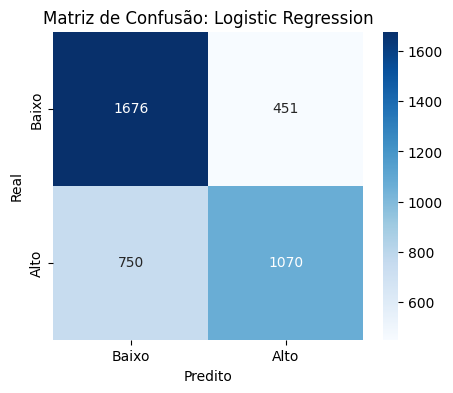

--- Avaliação do Random Forest Classifier ---
Accuracy: 0.8558
Precision: 0.8556
Recall: 0.8269
F1-score: 0.8410

Matriz de Confusão:
[[1873  254]
 [ 315 1505]]


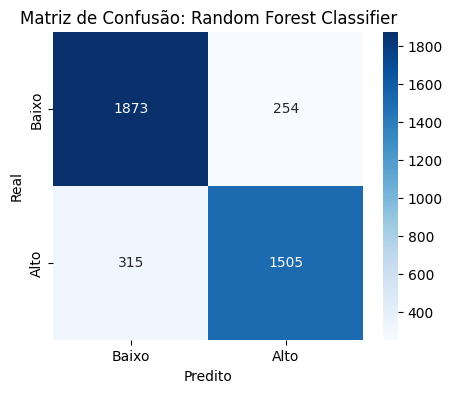

In [46]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Função para avaliar um modelo
def evaluate_model(y_true, y_pred, model_name):
    print(f"--- Avaliação do {model_name} ---")

    # Accuracy, precision, recall, F1-score
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred):.4f}")
    print(f"F1-score: {f1_score(y_true, y_pred):.4f}\n")

    # Matriz de confusão
    cm = confusion_matrix(y_true, y_pred)
    print("Matriz de Confusão:")
    print(cm)

    # Visualização da matriz de confusão
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Baixo','Alto'], yticklabels=['Baixo','Alto'])
    plt.xlabel('Predito')
    plt.ylabel('Real')
    plt.title(f'Matriz de Confusão: {model_name}')
    plt.show()

# Avaliar Logistic Regression
evaluate_model(y_test, y_pred_log, "Logistic Regression")

# Avaliar Random Forest
evaluate_model(y_test, y_pred_rf, "Random Forest Classifier")
